In [1]:
import numpy as np
import cv2 
from scipy import ndimage
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
import plotly.graph_objs as go

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

### About the dataset

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.


##### Link_of_Dataset = https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019



### Load the dataset

In [2]:
df = pd.read_csv('world-happiness-report-2019.csv')
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [3]:
df.shape #shape of the data

(156, 11)

## Exploratory Data Analysis

### Variable Identification
* $Country (region)$ = Name of the country
* $ Ladder $ = Cantril Ladder is a measure of life satisfaction
* $ SD \ of \ Ladder $ = Standard deviation of the ladder
* $ Positive \ affect $ = Measure of positive emotion
* $ Negative \ affect $ = Measure of negative emotion
* $ Social \ support $ = The extent to which Social support contributed to the calculation of the Happiness Score
* $ Freedom $ = The extent to which Freedom contributed to the calculation of the Happiness Score
* $ Corruption $ = The extent to which Perception of Corruption contributes to Happiness Score
* $ Generosity $ = The extent to which Generosity contributed to the calculation of the Happiness Score.
* $ Log \ of \ GDP \ per \ capita $ = The extent to which GDP contributes to the calculation of the Happiness Score
* $ Healthy \ life \ expectancy $ = The extent to which Life expectancy contributed to the calculation of the Happiness Score

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [5]:
print("""
No of columns: {}
No of rows: {}
No of categorical columns: {}
No of numerical columns: {}""".format(df.shape[1], 
                                      df.shape[0],
                                      len(df.select_dtypes('O').columns),
                                      len(df.select_dtypes(['int64', 'float64']).columns)))


No of columns: 11
No of rows: 156
No of categorical columns: 1
No of numerical columns: 10


In [6]:
df.columns

Index(['Country (region)', 'Ladder', 'SD of Ladder', 'Positive affect',
       'Negative affect', 'Social support', 'Freedom', 'Corruption',
       'Generosity', 'Log of GDP\nper capita', 'Healthy life\nexpectancy'],
      dtype='object')

In [7]:
categerical_col = ['Country (region)']
numerical_col = ['Ladder', 'SD of Ladder', 'Positive affect',
       'Negative affect', 'Social support', 'Freedom', 'Corruption',
       'Generosity', 'Log of GDP\nper capita']

### Univariate Analysis

#### Statistical view of Numerical Columns

In [8]:
df[numerical_col].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ladder,156.0,78.5,45.177428,1.0,39.75,78.5,117.25,156.0
SD of Ladder,156.0,78.5,45.177428,1.0,39.75,78.5,117.25,156.0
Positive affect,155.0,78.0,44.888751,1.0,39.50,78.0,116.50,155.0
Negative affect,155.0,78.0,44.888751,1.0,39.50,78.0,116.50,155.0
Social support,155.0,78.0,44.888751,1.0,39.50,78.0,116.50,155.0
Freedom,155.0,78.0,44.888751,1.0,39.50,78.0,116.50,155.0
Corruption,148.0,74.5,42.868014,1.0,37.75,74.5,111.25,148.0
Generosity,155.0,78.0,44.888751,1.0,39.50,78.0,116.50,155.0
Log of GDP\nper capita,152.0,76.5,44.022721,1.0,38.75,76.5,114.25,152.0


In [9]:
df[categerical_col].count()
#df['Country (region)'].value_counts()

Country (region)    156
dtype: int64

### Missing Value Analysis

In [10]:
df.isna().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

In [11]:
for col in numerical_col:
    df[col] = df[col].fillna(df[col].median())

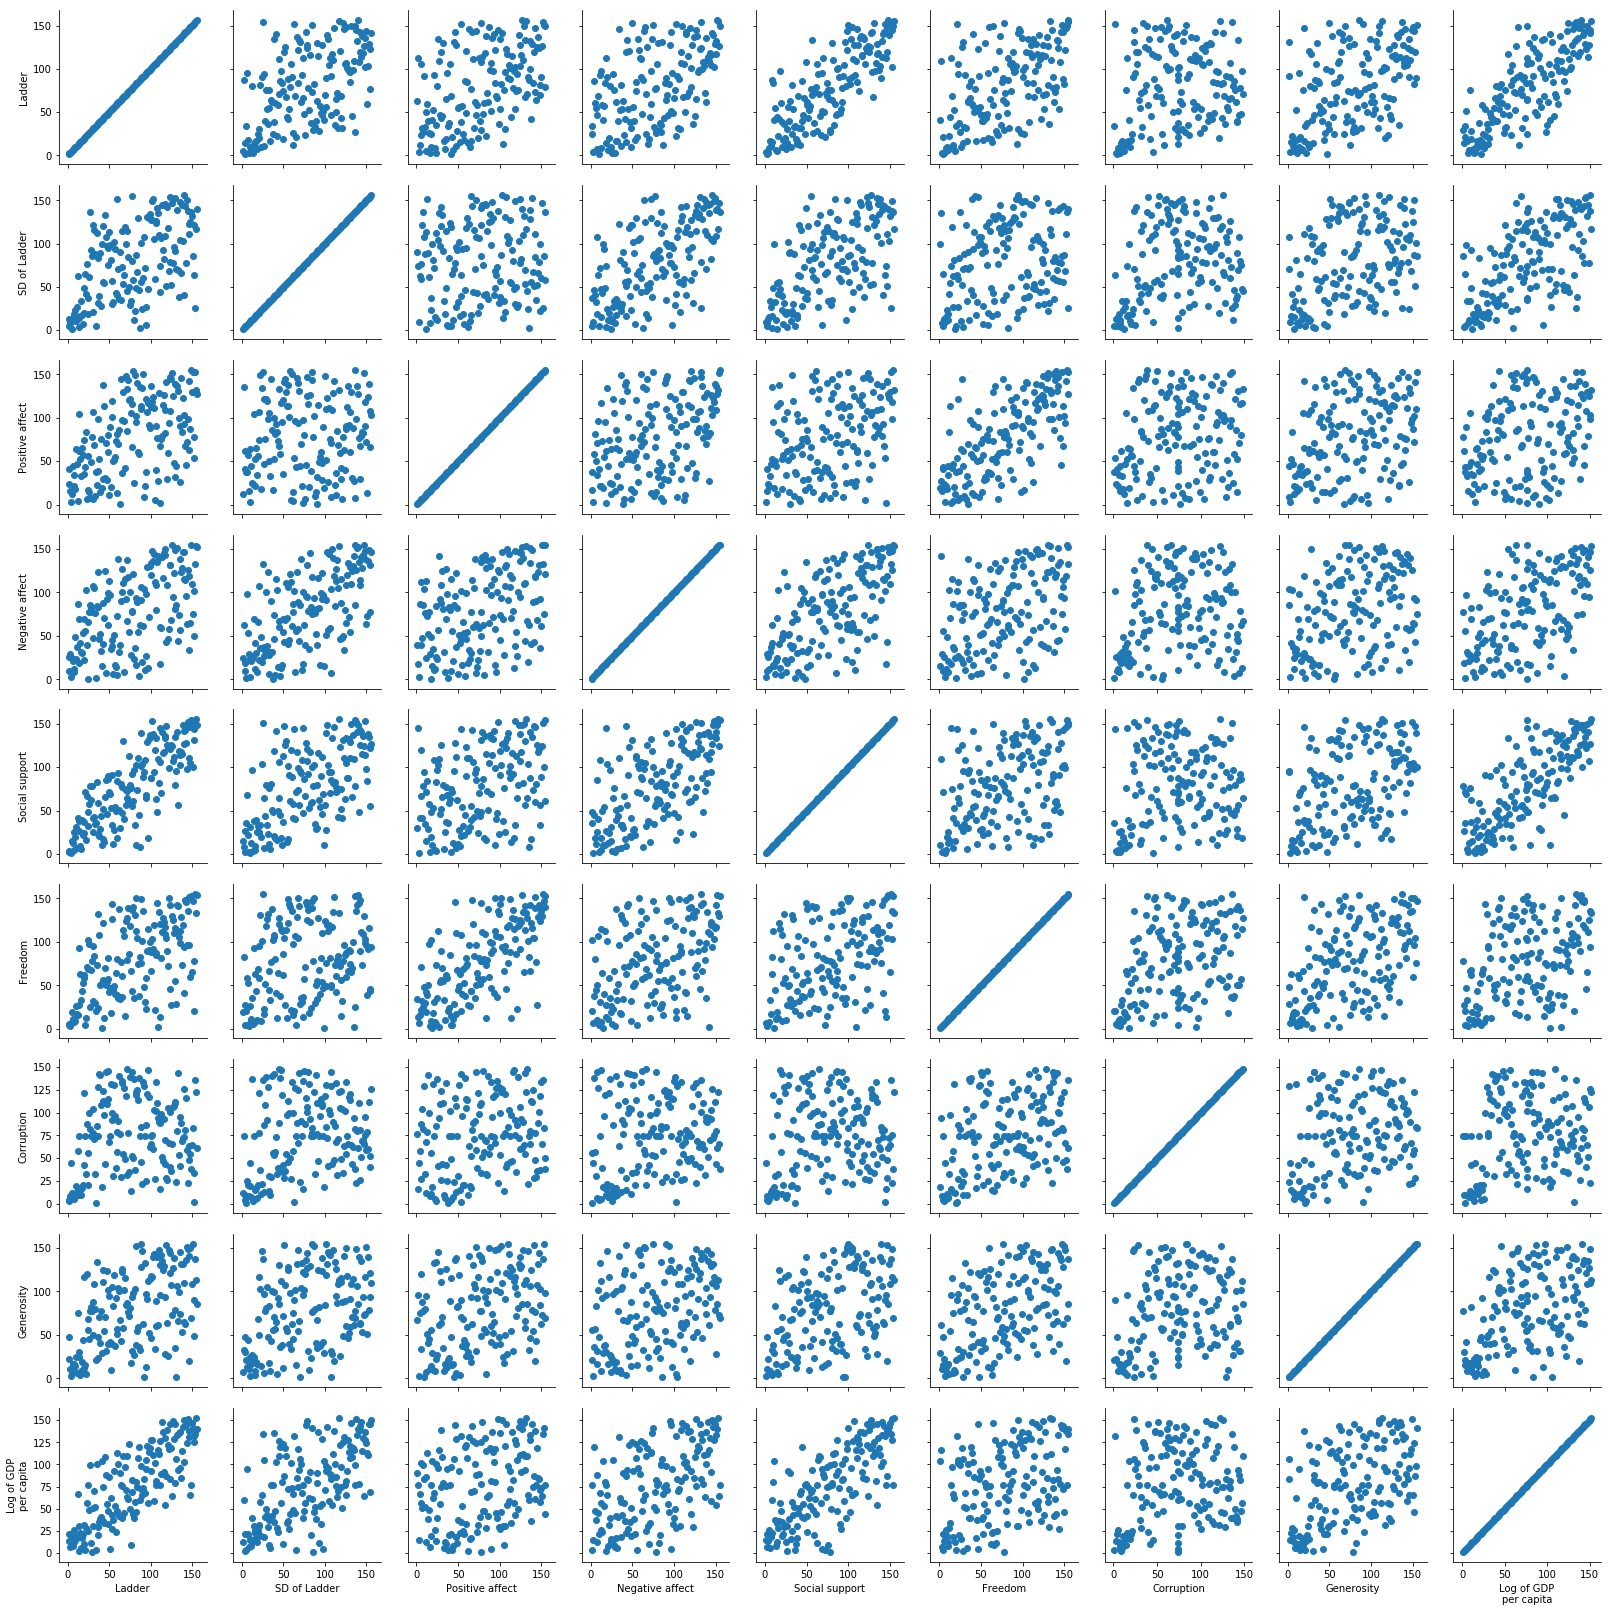

In [12]:
pair_grid = sns.PairGrid(df[numerical_col])
pair_grid.map(plt.scatter)

<Figure size 432x288 with 0 Axes>

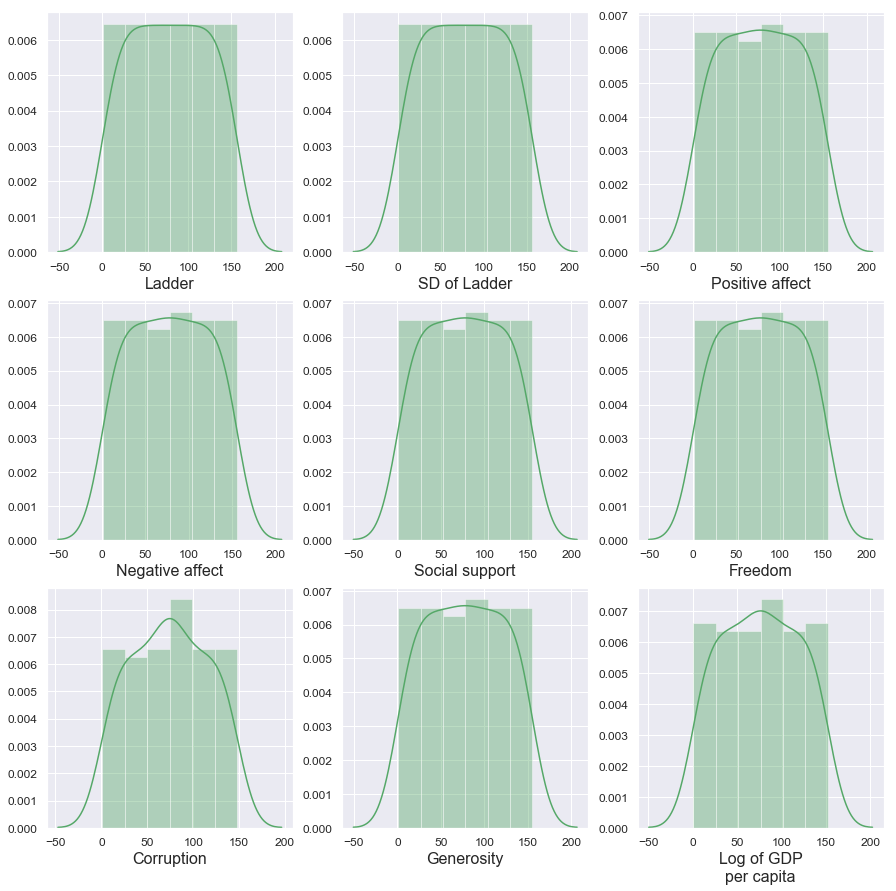

In [13]:
sns.set()
def plot_distribution(data, features):
    i = 0
    plt.figure()
    col = 3
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(15,15))

    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        sns.distplot(tuple(data[feature]),color="g")
        plt.xlabel(feature, fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=12)
        plt.tick_params(axis='y', which='major', labelsize=12)
    plt.show();
    
plot_distribution(df, numerical_col)

<Figure size 432x288 with 0 Axes>

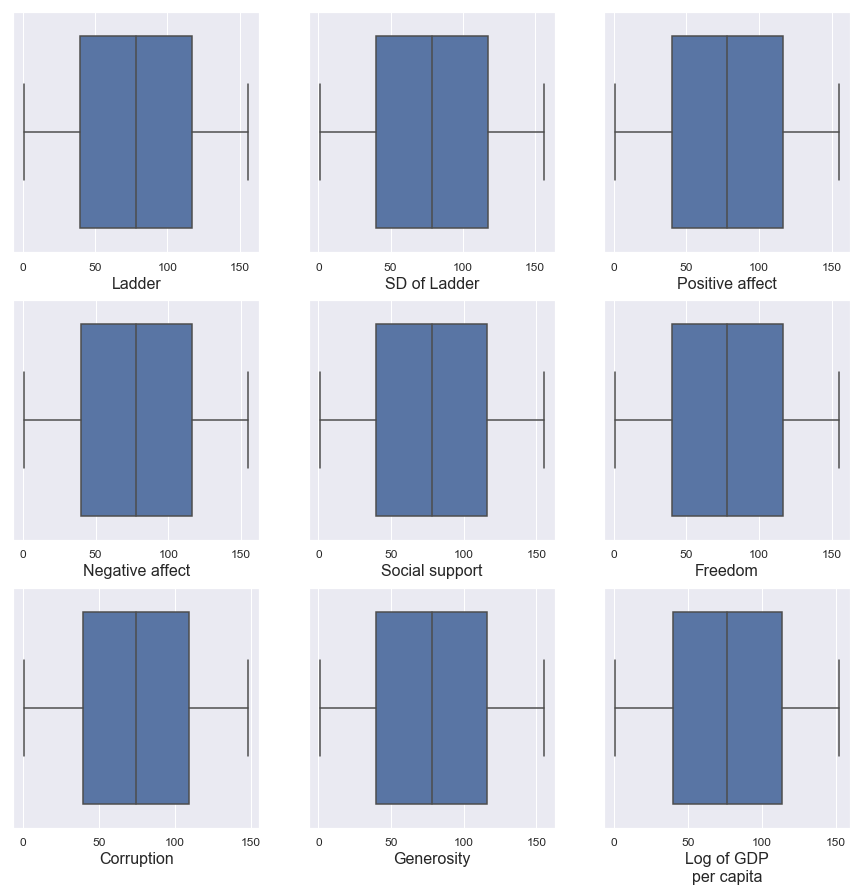

In [14]:
sns.set()
def plot_distribution(data, features):
    i = 0
    plt.figure()
    col = 3
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(15,15))

    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        sns.boxplot(tuple(data[feature]))
        plt.xlabel(feature, fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=12)
        plt.tick_params(axis='y', which='major', labelsize=12)
    plt.show();
    
plot_distribution(df, numerical_col)

#### boxplots represents that data have no Outlier values.  

### Bi-variate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DAEEDC83C8>,
      dtype=object)

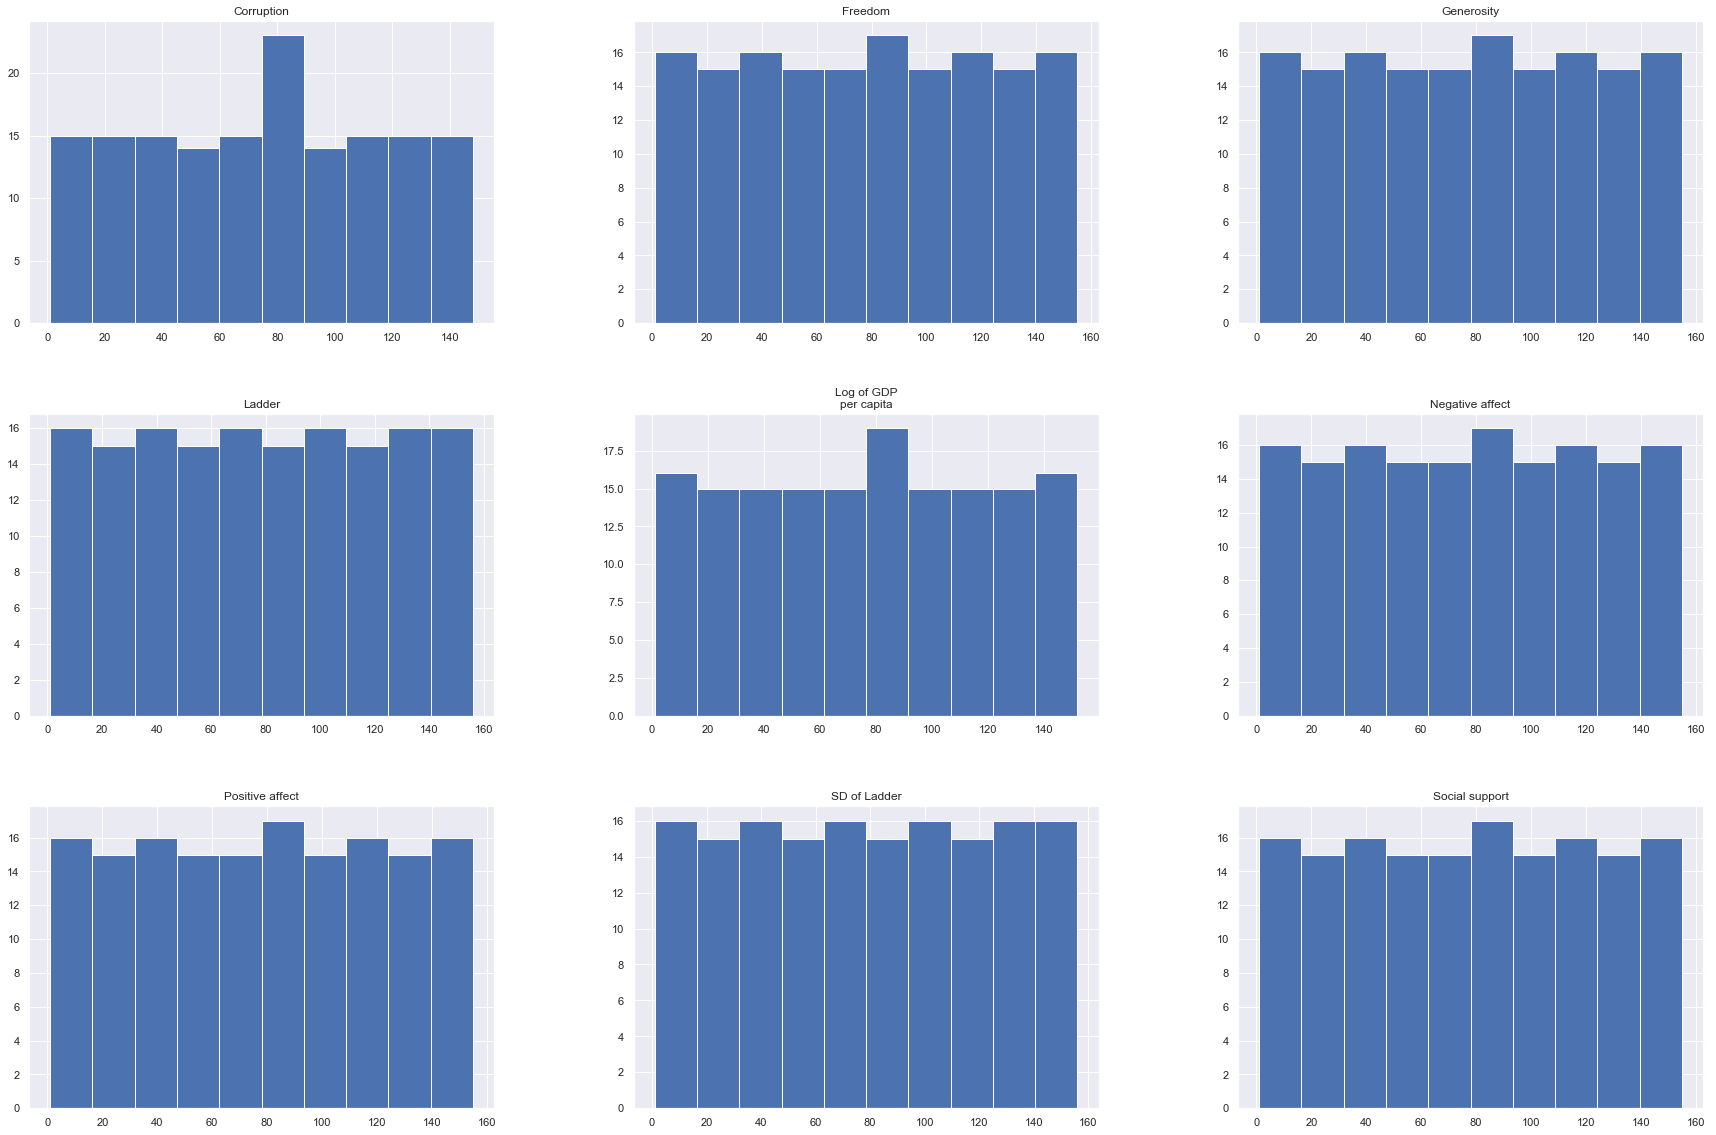

In [15]:
df[numerical_col].hist(figsize = (30, 20))

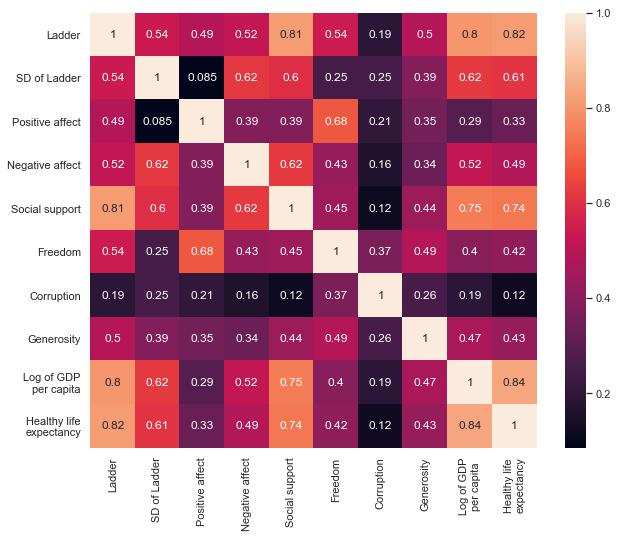

In [16]:
corr_matrix =  df.corr()
fig = plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True)

#### we see that 'Log of GDP per capita', 'Ladder' and 'Social support' are highly co-related with healty life expectancy country.

                          Healthy life\nexpectancy
Country (region)                                  
Central African Republic                     150.0
Lesotho                                      149.0
Chad                                         148.0
Ivory Coast                                  147.0
Sierra Leone                                 146.0
Nigeria                                      145.0
Somalia                                      144.0
South Sudan                                  143.0
Mali                                         142.0
Cameroon                                     141.0


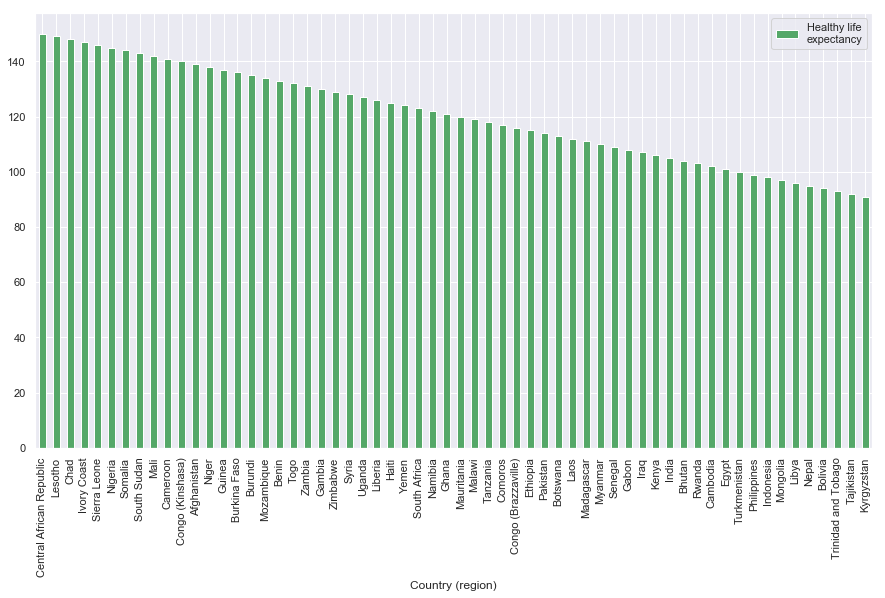

In [17]:
print(df[['Country (region)', 'Healthy life\nexpectancy']].groupby('Country (region)').mean().sort_values('Healthy life\nexpectancy', ascending=False).head(10))
happy_country = df[['Country (region)', 'Healthy life\nexpectancy']].groupby('Country (region)').mean().sort_values('Healthy life\nexpectancy', ascending = False).head(60)
happy_country.plot(kind = 'bar', color = 'g', figsize = (15,8))

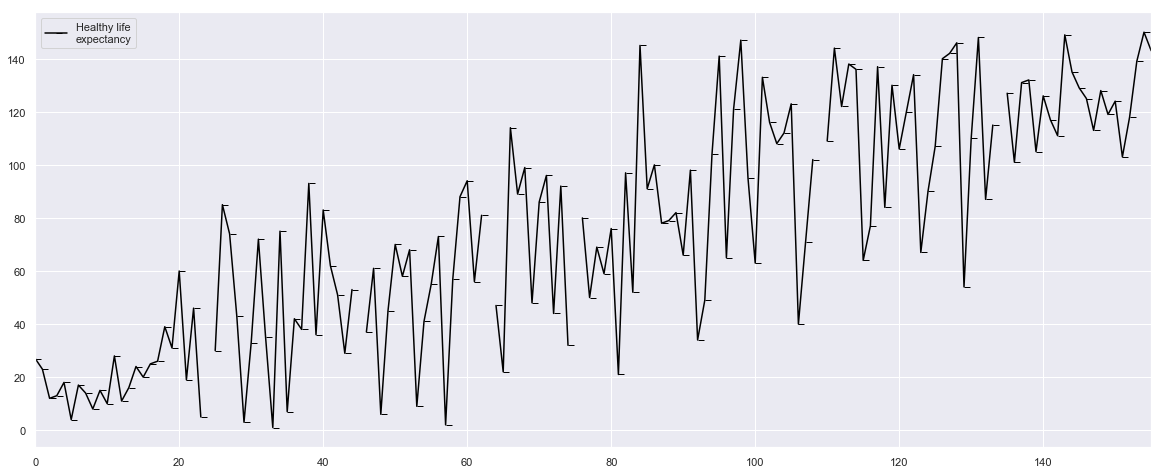

In [18]:
df[['Country (region)', 'Healthy life\nexpectancy']].plot(kind = 'line',color = 'black',marker=True, figsize = (20,8))

#### Pairplot return a grid that have two axis like as y-axis across a single row and x-axis across a single column. The diagonal axes show that the univariate distribution of data differently. 

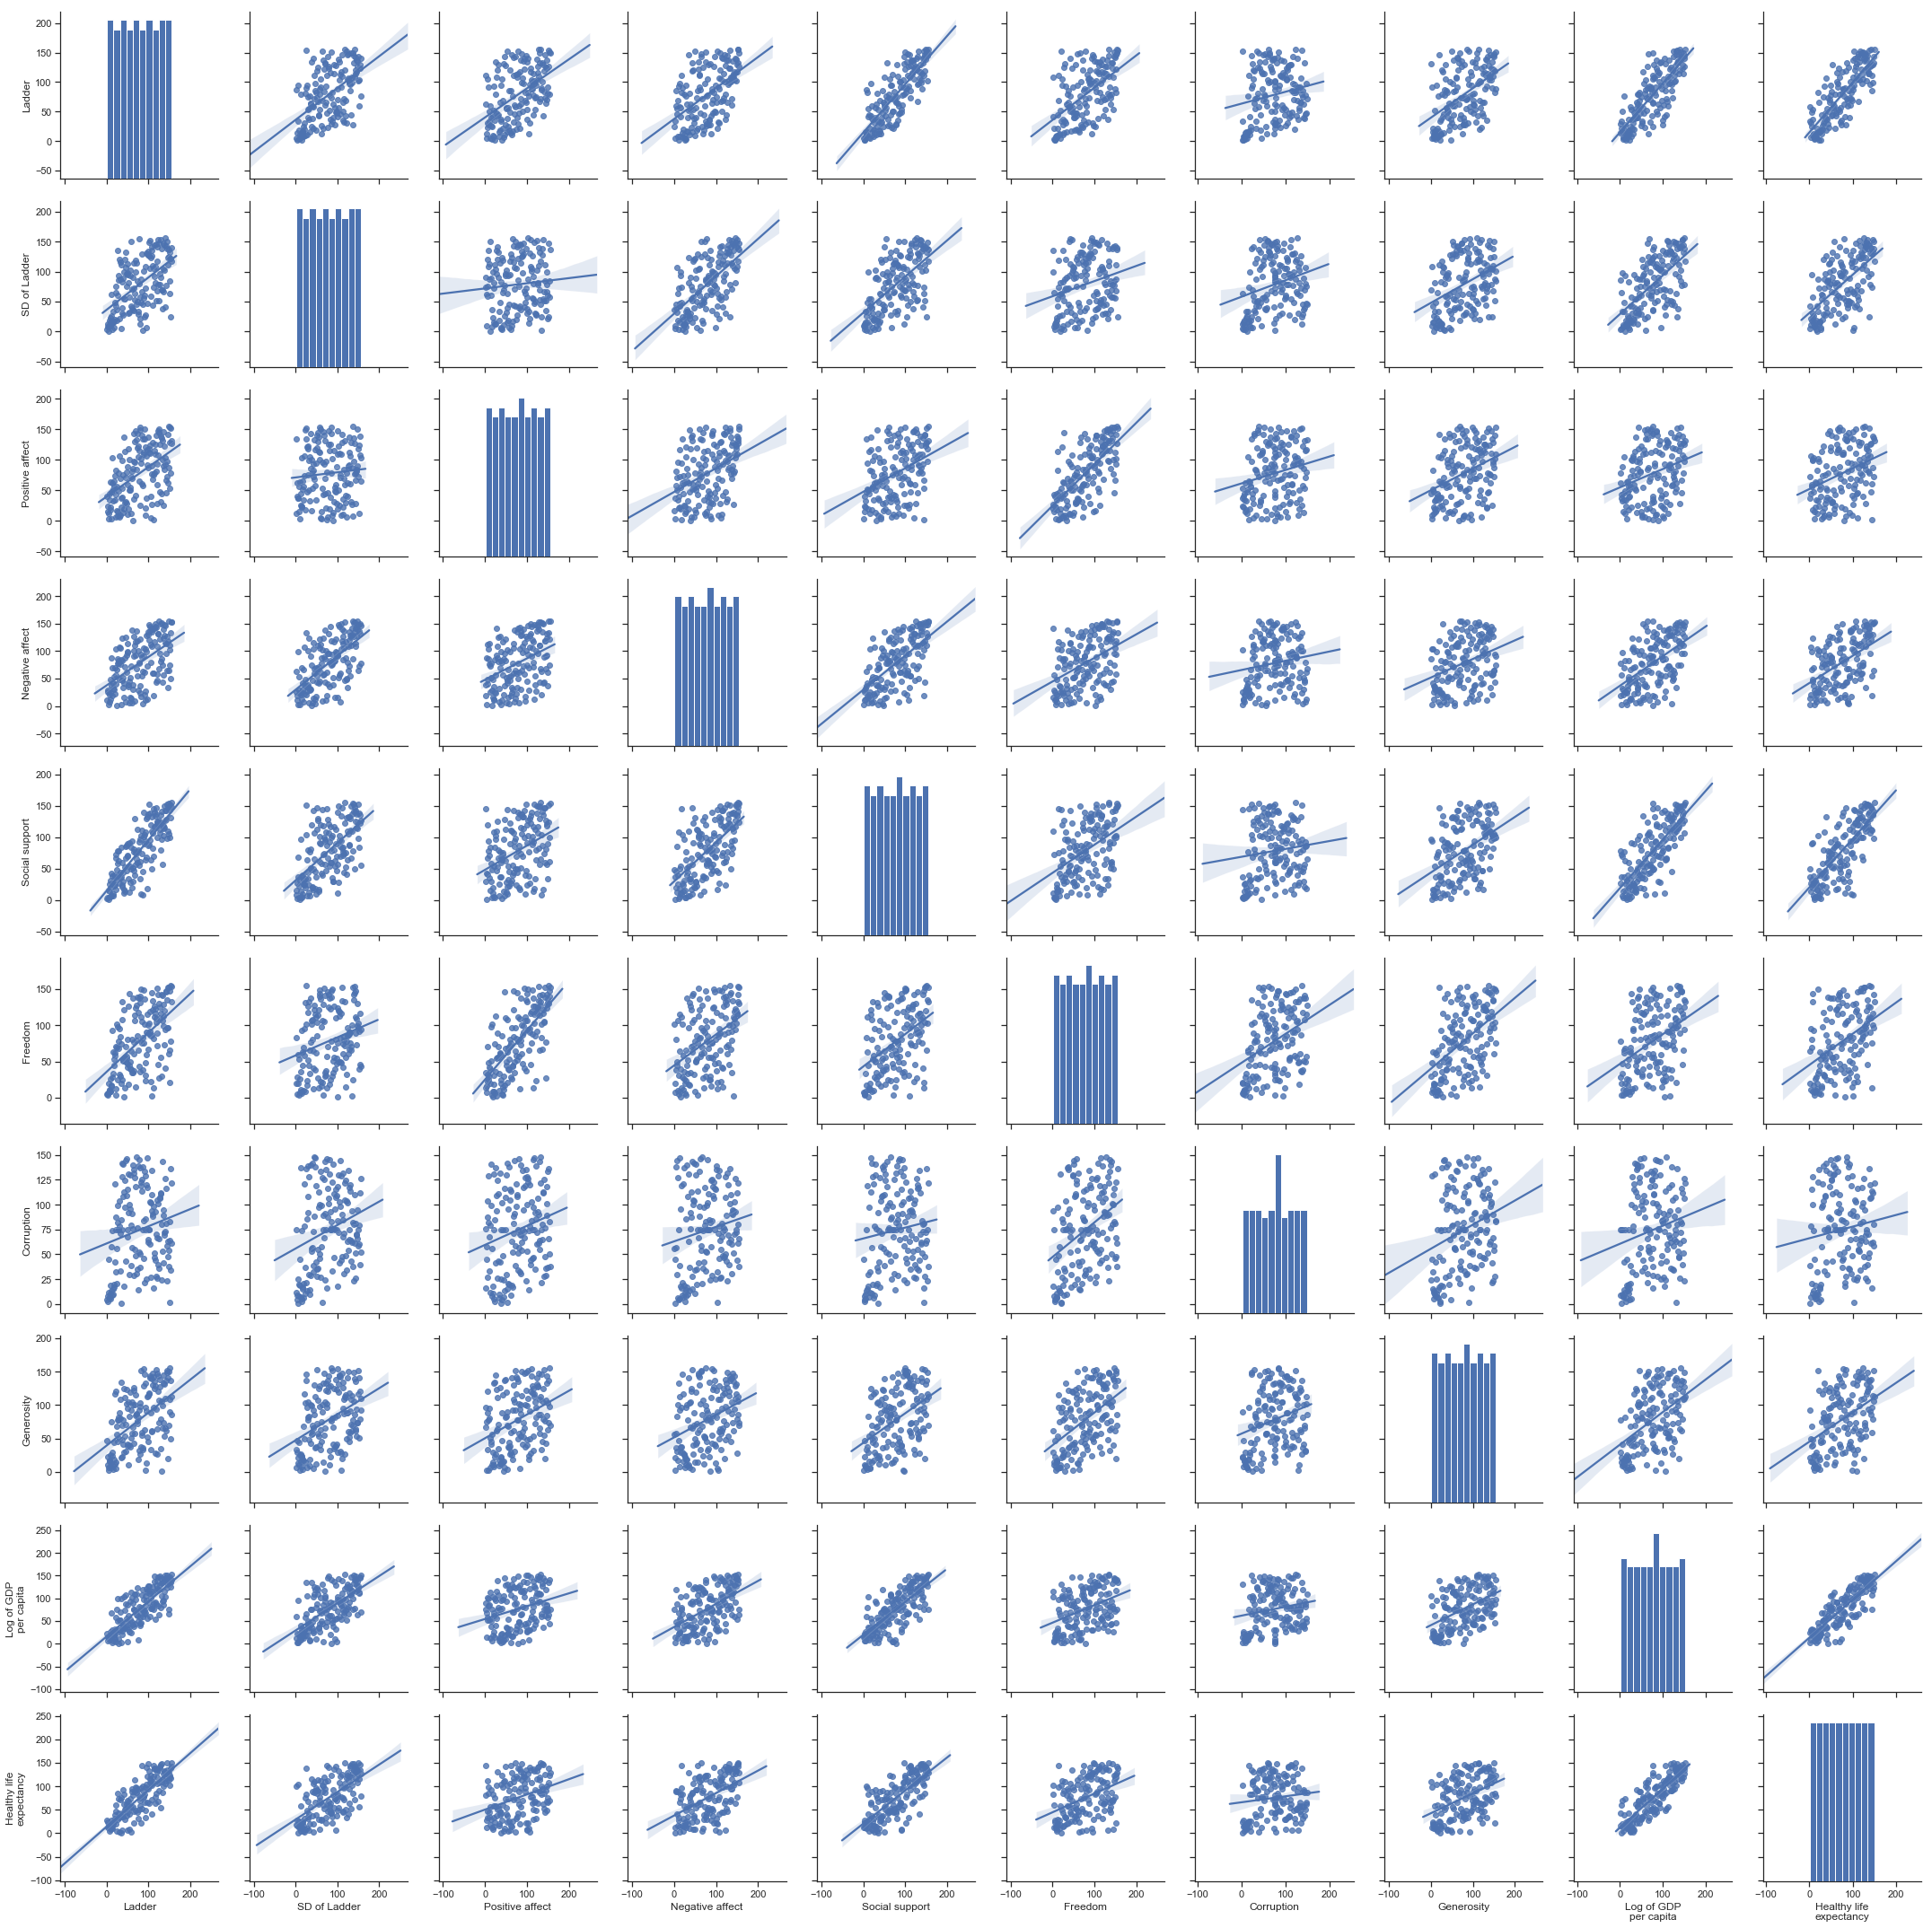

In [19]:
sns.set(style = 'ticks', color_codes=True)
p = sns.pairplot(data = df, palette="husl", kind="reg", size = 3)

#### Log of GDP per capita , Social support and Ladder are mostly fit regression line of Healthy life expectancy(Target column). In addition, diagonal axes shows that good data distribution. 

#### Class Imbalance Analysis

In [20]:
df['Healthy life\nexpectancy'].fillna(df['Healthy life\nexpectancy'].median(), inplace=True)

In [21]:
df['Healthy life\nexpectancy'].isna().sum()

0

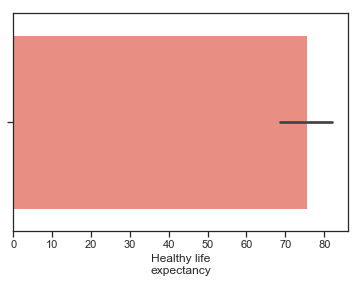

In [22]:
sns.barplot(df['Healthy life\nexpectancy'], color="salmon")

#### Dropping unnecessary columns

In [23]:
drop_col = ['Country (region)']
df.drop(drop_col, axis = 1, inplace = True)

In [24]:
df.columns

Index(['Ladder', 'SD of Ladder', 'Positive affect', 'Negative affect',
       'Social support', 'Freedom', 'Corruption', 'Generosity',
       'Log of GDP\nper capita', 'Healthy life\nexpectancy'],
      dtype='object')

In [25]:
X = df.loc[:,df.columns != 'Healthy life\nexpectancy']
y = df.loc[:,df.columns == 'Healthy life\nexpectancy']

### model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn import metrics

### Multiple Linear Regression

In [27]:
linear_reg = LinearRegression()

#### Split the data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 123)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, shuffle = True, random_state = 123)

print(""" Training dataset: {},
test dataset: {},""".format(X_train.shape,X_test.shape))

 Training dataset: (124, 9),
test dataset: (32, 9),


In [29]:
linear_reg.fit(X_train, y_train) # train the model
y_pred_reg = linear_reg.predict(X_test) #predict the model

In [30]:
#### Evaluate Multiple Linear Regression model

In [31]:
print("MAE score is: ", metrics.mean_absolute_error(y_test, y_pred_reg))
print("MSE score is: ", metrics.mean_squared_error(y_test, y_pred_reg))
print("RMSE score is: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_reg)))
print("The R^2 score is: ", metrics.r2_score(y_test,y_pred_reg))

MAE score is:  16.075980046810088
MSE score is:  377.9912507882483
RMSE score is:  19.441997088474434
The R^2 score is:  0.7862058150240431


### Polynomial Regression

In [32]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=1)
X_poly = poly_reg.fit_transform(X)

#### Split the data

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, shuffle = True, random_state = 123)

In [34]:
poly_reg = LinearRegression()
poly_reg.fit(X_train, y_train) #train the model
y_pred_poly = poly_reg.predict(X_test) #predict the model

#### Evaluate polynomial model

In [35]:
print("MAE score is: ", metrics.mean_absolute_error(y_test, y_pred_poly))
print("MSE score is: ", metrics.mean_squared_error(y_test, y_pred_poly))
print("RMSE score is: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))
print("The R^2 score is: ", metrics.r2_score(y_test,y_pred_poly))

MAE score is:  16.075980046810095
MSE score is:  377.99125078824875
RMSE score is:  19.441997088474444
The R^2 score is:  0.7862058150240429
